In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [20]:
data = pd.read_csv('../dataset2/dataset_McCabe.csv')

Separação dos dados e dos rótulos.

In [21]:
X = data.drop('defects',axis=1)
y = data['defects']

Dividir os dados em conjuntos de treinamento e teste.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Normalização de dados.

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(128,128,128),max_iter=1000, solver='lbfgs')

In [25]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 128, 128), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
predictions = mlp.predict(X_test)

In [27]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Classe real',
           xlabel='Classe prevista')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[2849  151]
 [ 522  127]]


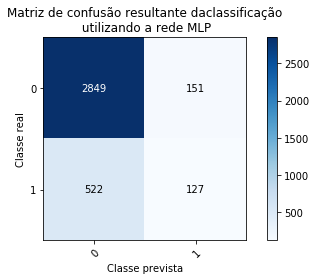

In [28]:
plot_confusion_matrix(y_test, predictions, classes=np.array([0,1]),
                      title='Matriz de confusão resultante da\
classificação\n utilizando a rede MLP');

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3000
           1       0.46      0.20      0.27       649

    accuracy                           0.82      3649
   macro avg       0.65      0.57      0.58      3649
weighted avg       0.78      0.82      0.78      3649



<div style='text-align:left;width:40%;float:left;'>
    <a href="./Random_Forest.ipynb">Anterior</a>
</div>
<div style='text-align:right;width:30%; float:right'>
    <a href="./SVM.ipynb">Próximo</a>
</div>